In [1]:
import pandas as pd
df=pd.read_csv('Yelp_Dataset_Review.csv')
df.tail(10)

review_id                 user_id  \
699018  y8K-dsVC3T1qBngrnSPOBg  WRvYIPtQLOH9v_4DOqeEDw   
699019  qPQWNAVK61BbokeuxI29Yw  nlHQyySiVBAlcRVJM11gwA   
699020  KXvuviRh4gslr9H166C3wg  Dzo_jZq-EXNNk2eXs18D_A   
699021  nCpZEz5z9kXeaia9fCIsMg  -_Y8Mal7S750TsB6yMMDHA   
699022  Q6pg3XQJV_85P4BUrLKMIw  5Cs7H8EAPqHp295fVkSuLg   
699023  UZgg0nS2jVQHM7xW4XpEEg  Ha2os3twGeYVFMwDIzEBtQ   
699024  KJlYl1UlDH2ns5Wztg6cCQ  KFI4A6qVt_c1FV03QvUsJg   
699025  gSJDVzWwvOnJFPokDCynzg  6pUUac7ddgLcA1pUpm6cZQ   
699026  8-v6LaJ9BosKzMsDOWsHiA  ivwwSi38TPdxS1lOvqLrSA   
699027  sURWQ1w2kNRwdIHjT1fpeA  HyecqwXeafZ9umTSw5WdOA   

                   business_id  stars  useful  funny  cool  \
699018  jaDwjhIkN0zjJZRRnP7Pcg      1       1      0     0   
699019  QZNgG4zxTPiLUoVjJLEcrg      1       1      0     0   
699020  0d1dpaZqcm7litFOJl7atA      5       0      0     0   
699021  Cbktlvci_z4HwdqPUW-5cg      3       0      0     0   
699022  t9lFIoKltOdbRWpJLFpCOA      5       2      0     1   
699023  ONuqtwn8euUIWumg3U_4DQ      1       0      0     0   
699024  s6Sp7FLtuUmErh9DwrdpMA      5       2      0     2   
699025  Vpv7_M6dpg92GwappohXlw      5       0      0     0   
699026  Rgrr-E9oW6ChtYeD1ZNBiQ      1       3      0     0   
699027  bVwshpRymmsAGlmXTj-bGA      5       3      0     1   

                                                     text                 date  
699018  I've been eating Rolyno's for a while now and ...  2021-10-11 19:57:30  
699019  Horrible, costly and painful experience.  Bein...  2014-10-29 23:22:10  
699020  What a great experience!   Our server Katie wa...  2017-08-31 16:38:28  
699021  Wonder why people rate this so low. ...it's a ...  2015-02-20 04:56:54  
699022  We found this place by accident and it was del...  2016-12-03 19:38:32  
699023  First off, as a child and as a young man I lov...  2017-04-06 18:32:37  
699024  The praise heaped upon Milkfish by Yelp review...  2015-05-13 16:03:17  
699025  Dinner tonight was an amazing experience. The ...  2020-08-10 01:24:18  
699026  DO NOT do business with them! \nI canceled our...  2018-03-24 17:36:11  
699027  I am very pleased with all of my experiences a...  2017-08-07 23:31:40

In [5]:
from wordcloud import WordCloud
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


stop_words = stopwords.words()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eyad_\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eyad_\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699028 entries, 0 to 699027
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   review_id    699028 non-null  object
 1   user_id      699028 non-null  object
 2   business_id  699028 non-null  object
 3   stars        699028 non-null  int64 
 4   useful       699028 non-null  int64 
 5   funny        699028 non-null  int64 
 6   cool         699028 non-null  int64 
 7   text         699028 non-null  object
 8   date         699028 non-null  object
dtypes: int64(4), object(5)
memory usage: 48.0+ MB


In [4]:
df.describe()

stars         useful          funny           cool
count  699028.000000  699028.000000  699028.000000  699028.000000
mean        3.750120       1.187565       0.327696       0.500682
std         1.478358       3.560743       1.661590       2.297529
min         1.000000       0.000000       0.000000       0.000000
25%         3.000000       0.000000       0.000000       0.000000
50%         4.000000       0.000000       0.000000       0.000000
75%         5.000000       1.000000       0.000000       0.000000
max         5.000000     997.000000     353.000000     360.000000

In [5]:
df['stars'].value_counts()

stars
5    323605
4    145062
1    106842
3     69286
2     54233
Name: count, dtype: int64

<Axes: >

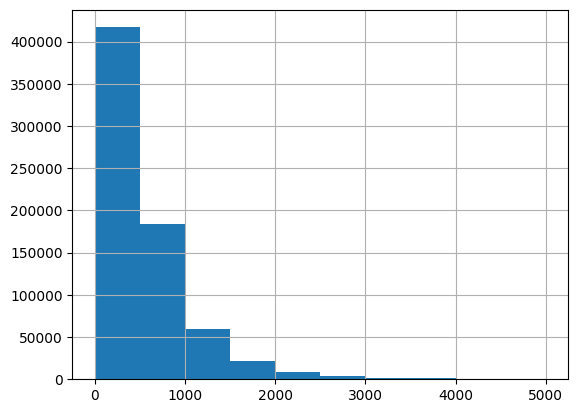

In [2]:
df['text'].str.len().hist()

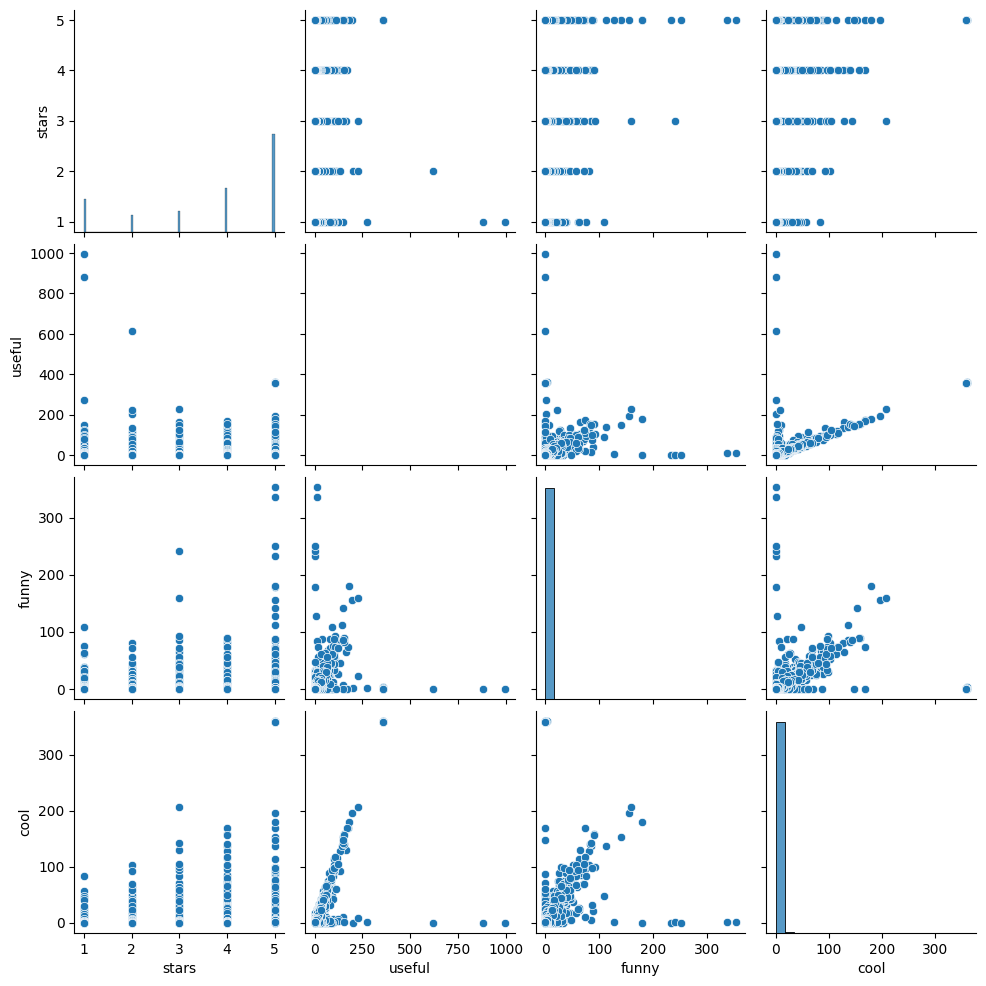

In [7]:
import seaborn as sns
sns.pairplot(df)


In [2]:
df.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [6]:
import pandas as pd



# الاحتفاظ فقط بالأعمدة 'text' و 'stars'
df1 = df[['text', 'stars']]

# عرض العينة الأولى من البيانات للتأكد
df1.head()

text  stars
0  Ahhhhhmmmmaaaaazzzziiiiiinnnggggg!!! I wish th...      5
1  First, the employees at Payless Car Rental loc...      1
2  People are very friendly. The Gun Smith is the...      5
3  My check engine light was on. Walked in and ou...      5
4  BurgerFuel is a sort of unique place. I really...      5

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns



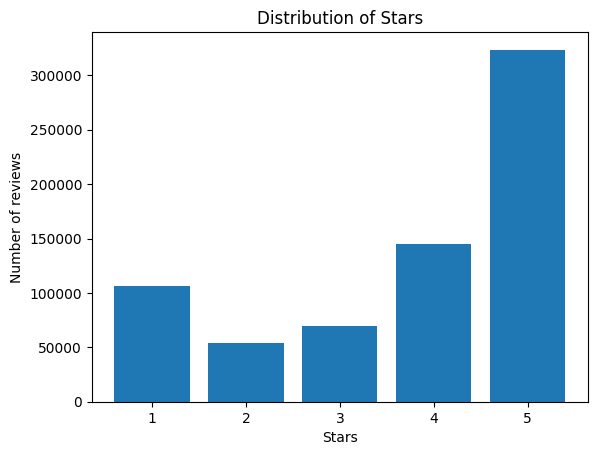

In [6]:
values, counts = np.unique(df1['stars'], return_counts=True)
plt.figure()
plt.bar(values, counts, tick_label=['1','2','3','4','5'])
plt.title('Distribution of Stars')
plt.xlabel('Stars')
plt.ylabel('Number of reviews')
plt.show()


In [8]:
# Create new column "Target" that stored 0's or 1's. 0 being Negative, 1 being Positive
import numpy as np
df1["Sentiment"] = np.where(df1["stars"] >= 3, 1, 0)
df1.head(10)

C:\Users\eyad_\AppData\Local\Temp\ipykernel_19804\1435257135.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Sentiment"] = np.where(df1["stars"] >= 3, 1, 0)


text  stars  Sentiment
0  Ahhhhhmmmmaaaaazzzziiiiiinnnggggg!!! I wish th...      5          1
1  First, the employees at Payless Car Rental loc...      1          0
2  People are very friendly. The Gun Smith is the...      5          1
3  My check engine light was on. Walked in and ou...      5          1
4  BurgerFuel is a sort of unique place. I really...      5          1
5  This is your classic old school italian joint....      4          1
6  The waitresses were very nice and friendly but...      2          0
7  Wonderful, wonderful staff. The front office w...      4          1
8  This place is a gem.  Absolutely great food an...      5          1
9  Breanne Brooks is absolutely amazing! I had be...      5          1

In [9]:
df_final=df1[['text','Sentiment']]
df_final.head(10)

text  Sentiment
0  Ahhhhhmmmmaaaaazzzziiiiiinnnggggg!!! I wish th...          1
1  First, the employees at Payless Car Rental loc...          0
2  People are very friendly. The Gun Smith is the...          1
3  My check engine light was on. Walked in and ou...          1
4  BurgerFuel is a sort of unique place. I really...          1
5  This is your classic old school italian joint....          1
6  The waitresses were very nice and friendly but...          0
7  Wonderful, wonderful staff. The front office w...          1
8  This place is a gem.  Absolutely great food an...          1
9  Breanne Brooks is absolutely amazing! I had be...          1

In [10]:
from wordcloud import WordCloud
# Dividing the reviews to positive and negative
pos = df_final[df_final['Sentiment']==1]['text']
neg = df_final[df_final['Sentiment']==0]['text']

Text(0.5, 1.0, 'Negative Reviews')

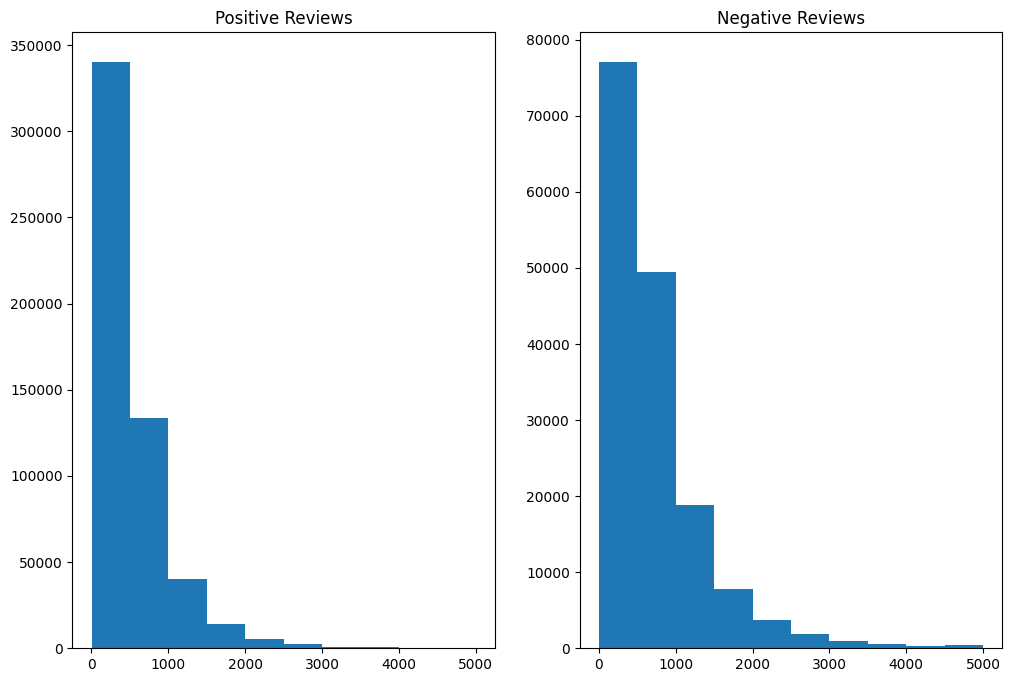

In [8]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
ax1.hist(df_final[df_final['Sentiment']==1]['text'].str.len())
ax1.set_title( 'Positive Reviews')
ax2.hist(df_final[df_final['Sentiment']==0]['text'].str.len())
ax2.set_title( 'Negative Reviews')

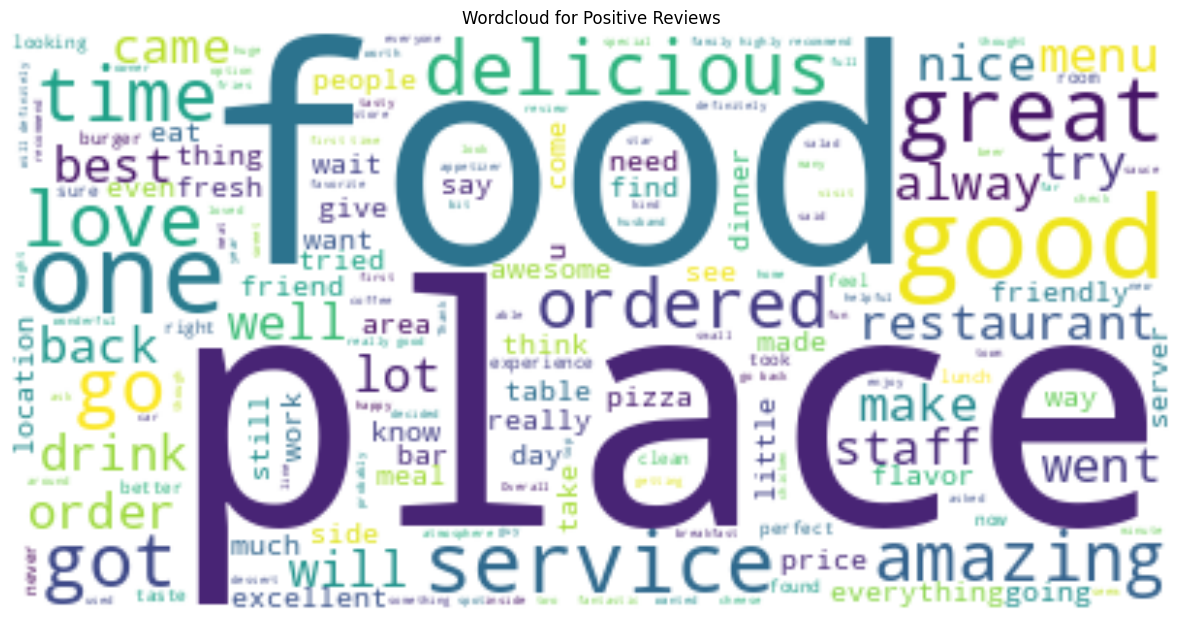

In [8]:
# اختيار عدد محدود من المراجعات الإيجابية لتجنب مشاكل الذاكرة
sample_text = " ".join(i for i in df_final[df_final['Sentiment'] == 1]['text'].head(100000))
wordcloud = WordCloud(background_color="white").generate(sample_text)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud for Positive Reviews')
plt.show()


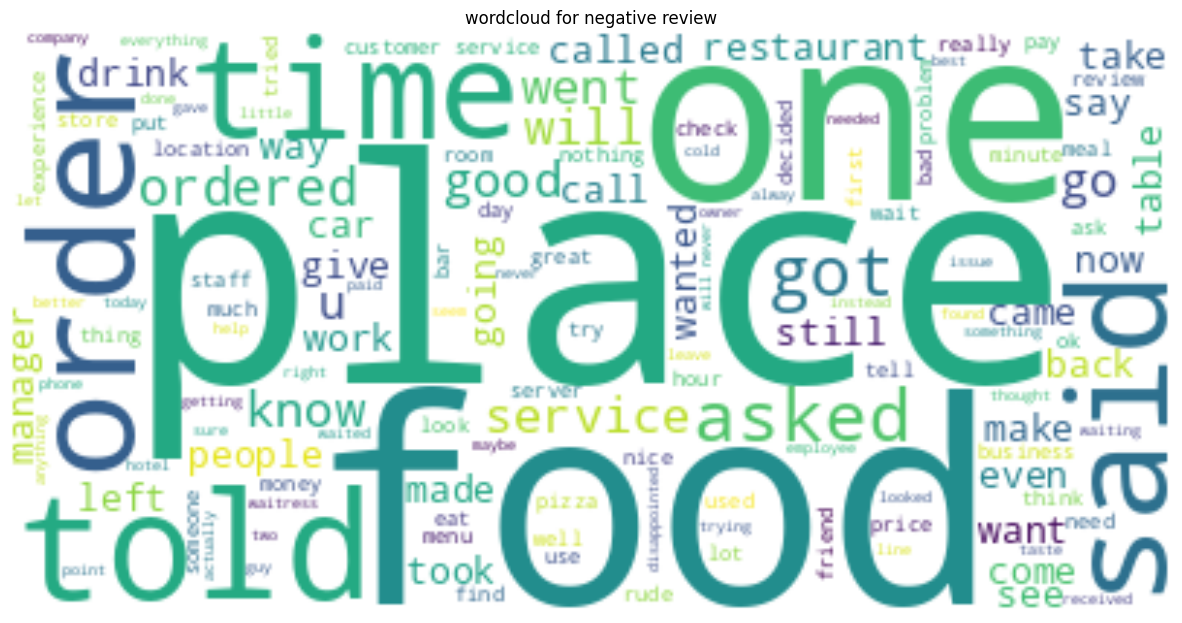

In [14]:
text = " ".join(i for i in df_final[df_final['Sentiment']==0]['text'].tail(200000))
#stopwords = set(STOPWORDS)
wordcloud = WordCloud( background_color="white").generate(text)
#wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('wordcloud for negative review')
plt.show()

In [11]:
import re
import string

def cleaning(text):        
    # converting to lowercase, removing URL links, special characters, punctuations...
    text = text.lower() # converting to lowercase
    text = re.sub('https?://\S+|www\.\S+', '', text) # removing URL links
    text = re.sub(r"\b\d+\b", "", text) # removing number 
    text = re.sub('<.*?>+', '', text) # removing special characters, 
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # punctuations
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)



     #removing emoji: 
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)   



    # removing short form: 
    
    text=re.sub("isn't",'is not',text)
    text=re.sub("he's",'he is',text)
    text=re.sub("wasn't",'was not',text)
    text=re.sub("there's",'there is',text)
    text=re.sub("couldn't",'could not',text)
    text=re.sub("won't",'will not',text)
    text=re.sub("they're",'they are',text)
    text=re.sub("she's",'she is',text)
    text=re.sub("There's",'there is',text)
    text=re.sub("wouldn't",'would not',text)
    text=re.sub("haven't",'have not',text)
    text=re.sub("That's",'That is',text)
    text=re.sub("you've",'you have',text)
    text=re.sub("He's",'He is',text)
    text=re.sub("what's",'what is',text)
    text=re.sub("weren't",'were not',text)
    text=re.sub("we're",'we are',text)
    text=re.sub("hasn't",'has not',text)
    text=re.sub("you'd",'you would',text)
    text=re.sub("shouldn't",'should not',text)
    text=re.sub("let's",'let us',text)
    text=re.sub("they've",'they have',text)
    text=re.sub("You'll",'You will',text)
    text=re.sub("i'm",'i am',text)
    text=re.sub("we've",'we have',text)
    text=re.sub("it's",'it is',text)
    text=re.sub("don't",'do not',text)
    text=re.sub("that´s",'that is',text)
    text=re.sub("I´m",'I am',text)
    text=re.sub("it’s",'it is',text)
    text=re.sub("she´s",'she is',text)
    text=re.sub("he’s'",'he is',text)
    text=re.sub('I’m','I am',text)
    text=re.sub('I’d','I did',text)
    text=re.sub("he’s'",'he is',text)
    text=re.sub('there’s','there is',text)
    
     
    return text
    
dt = df_final['text'].apply(cleaning)

In [12]:
dt = pd.DataFrame(dt)  
dt['Sentiment']=df_final['Sentiment']
dt

text  Sentiment
0       ahhhhhmmmmaaaaazzzziiiiiinnnggggg i wish they ...          1
1       first the employees at payless car rental loca...          0
2       people are very friendly the gun smith is the ...          1
3       my check engine light was on walked in and out...          1
4       burgerfuel is a sort of unique place i really ...          1
...                                                   ...        ...
699023  first off as a child and as a young man i love...          0
699024  the praise heaped upon milkfish by yelp review...          1
699025  dinner tonight was an amazing experience the f...          1
699026  do not do business with them i canceled our sp...          0
699027  i am very pleased with all of my experiences a...          1

[699028 rows x 2 columns]

### Stop Word

In [13]:
import nltk
from nltk.corpus import stopwords

# تحميل الكلمات التوقيفية
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# إزالة الكلمات التوقيفية من النصوص
dt['no_sw'] = dt['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eyad_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
#Working with the most Frequent Words: 
from collections import Counter
cnt = Counter()
for text in dt["no_sw"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word   count
0     food  354162
1     good  321937
2    place  312742
3    great  301362
4  service  223614
5     time  220375
6     like  215865
7      get  211478
8      one  208565
9     back  201039

In [31]:
import plotly.express as px
px.bar(temp, x="count", y="word", title='Commmon Words in Text', orientation='h', 
             width=700, height=700)

In [15]:
# Remove the most frequent words:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])
dt["wo_stopfreq"] = dt["no_sw"].apply(lambda text: remove_freqwords(text))
dt.head()

text  Sentiment  \
0  ahhhhhmmmmaaaaazzzziiiiiinnnggggg i wish they ...          1   
1  first the employees at payless car rental loca...          0   
2  people are very friendly the gun smith is the ...          1   
3  my check engine light was on walked in and out...          1   
4  burgerfuel is a sort of unique place i really ...          1   

                                               no_sw  \
0  ahhhhhmmmmaaaaazzzziiiiiinnnggggg wish would b...   
1  first employees payless car rental located nor...   
2                     people friendly gun smith best   
3  check engine light walked fixed minutes great ...   
4  burgerfuel sort unique place really enjoy ever...   

                                         wo_stopfreq  
0  ahhhhhmmmmaaaaazzzziiiiiinnnggggg wish would b...  
1  first employees payless car rental located nor...  
2                     people friendly gun smith best  
3       check engine light walked fixed minutes help  
4  burgerfuel sort unique really enjoy everything...

In [45]:
dt['no_sw'].loc[5]

'classic old school italian joint kind dark interior windows service good food decent'

In [46]:
dt['wo_stopfreq'].loc[5]

'classic old school italian joint kind dark interior windows decent'

In [16]:
# Lemmatization: Lemmatization is converting the word to its base form or lemma by removing affixes from the inflected words. 
# It helps to create better features for machine learning and NLP models hence it is an important preprocessing step.

import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
wordnet_lem = WordNetLemmatizer()

dt['wo_stopfreq_lem'] = dt['wo_stopfreq'].apply(wordnet_lem.lemmatize)
dt

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\eyad_\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\eyad_\AppData\Roaming\nltk_data...


text  Sentiment  \
0       ahhhhhmmmmaaaaazzzziiiiiinnnggggg i wish they ...          1   
1       first the employees at payless car rental loca...          0   
2       people are very friendly the gun smith is the ...          1   
3       my check engine light was on walked in and out...          1   
4       burgerfuel is a sort of unique place i really ...          1   
...                                                   ...        ...   
699023  first off as a child and as a young man i love...          0   
699024  the praise heaped upon milkfish by yelp review...          1   
699025  dinner tonight was an amazing experience the f...          1   
699026  do not do business with them i canceled our sp...          0   
699027  i am very pleased with all of my experiences a...          1   

                                                    no_sw  \
0       ahhhhhmmmmaaaaazzzziiiiiinnnggggg wish would b...   
1       first employees payless car rental located nor...   
2                          people friendly gun smith best   
3       check engine light walked fixed minutes great ...   
4       burgerfuel sort unique place really enjoy ever...   
...                                                   ...   
699023  first child young man loved sears name trusted...   
699024  praise heaped upon milkfish yelp reviewers com...   
699025  dinner tonight amazing experience food flat de...   
699026  business canceled space used week two months p...   
699027  pleased experiences new leaf chinese japanese ...   

                                              wo_stopfreq  \
0       ahhhhhmmmmaaaaazzzziiiiiinnnggggg wish would b...   
1       first employees payless car rental located nor...   
2                          people friendly gun smith best   
3            check engine light walked fixed minutes help   
4       burgerfuel sort unique really enjoy everything...   
...                                                   ...   
699023  first child young man loved sears name trusted...   
699024  praise heaped upon milkfish yelp reviewers com...   
699025  dinner tonight amazing experience flat delicio...   
699026  business canceled space used week two months p...   
699027  pleased experiences new leaf chinese japanese ...   

                                          wo_stopfreq_lem  
0       ahhhhhmmmmaaaaazzzziiiiiinnnggggg wish would b...  
1       first employees payless car rental located nor...  
2                          people friendly gun smith best  
3            check engine light walked fixed minutes help  
4       burgerfuel sort unique really enjoy everything...  
...                                                   ...  
699023  first child young man loved sears name trusted...  
699024  praise heaped upon milkfish yelp reviewers com...  
699025  dinner tonight amazing experience flat delicio...  
699026  business canceled space used week two months p...  
699027  pleased experiences new leaf chinese japanese ...  

[699028 rows x 5 columns]

# Tokenization

In [18]:
# create the cleaned data for the train-test split:
nb=dt.drop(columns=['text','no_sw', 'wo_stopfreq'])
nb.columns=['Sentiment','Review']
nb

Sentiment                                             Review
0               1  ahhhhhmmmmaaaaazzzziiiiiinnnggggg wish would b...
1               0  first employees payless car rental located nor...
2               1                     people friendly gun smith best
3               1       check engine light walked fixed minutes help
4               1  burgerfuel sort unique really enjoy everything...
...           ...                                                ...
699023          0  first child young man loved sears name trusted...
699024          1  praise heaped upon milkfish yelp reviewers com...
699025          1  dinner tonight amazing experience flat delicio...
699026          0  business canceled space used week two months p...
699027          1  pleased experiences new leaf chinese japanese ...

[699028 rows x 2 columns]

In [19]:


# وظيفة لتقسيم البيانات إلى دفعات
def split_dataframe(df, chunk_size):
    for start in range(0, df.shape[0], chunk_size):
        yield df.iloc[start:start + chunk_size]

# تحديد حجم الدفعة (مثلاً 10000)
chunk_size = 150000

# تقسيم البيانات إلى دفعات
chunks = list(split_dataframe(nb['Review'], chunk_size))

# قائمة لتخزين الدفعات بعد التوكنة
tokenized_chunks = []

# تطبيق التوكنة على كل دفعة وتخزين النتيجة
for i, chunk in enumerate(chunks):
    print(f"Processing chunk {i+1}/{len(chunks)}")
    tokenized_review = chunk.apply(lambda x: x.split())
    tokenized_chunks.append(tokenized_review)

# دمج الدفعات مرة أخرى في DataFrame واحد
tokenized_review = pd.concat(tokenized_chunks, ignore_index=True)

# عرض أول 5 أسطر بعد الدمج
print(tokenized_review.head())


Processing chunk 1/5
Processing chunk 2/5
Processing chunk 3/5
Processing chunk 4/5
Processing chunk 5/5
0    [ahhhhhmmmmaaaaazzzziiiiiinnnggggg, wish, woul...
1    [first, employees, payless, car, rental, locat...
2                 [people, friendly, gun, smith, best]
3    [check, engine, light, walked, fixed, minutes,...
4    [burgerfuel, sort, unique, really, enjoy, ever...
Name: Review, dtype: object


In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(nb['Review'])

C:\Users\eyad_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [23]:
from sklearn.model_selection import train_test_split
X=text_counts
y=nb['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=30)

In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)
from sklearn import metrics
MNB = MultinomialNB()
MNB.fit(X_train, y_train)

predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('MultinominalNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

MultinominalNB model accuracy is 87.92%
------------------------------------------------
Confusion Matrix:
       0      1
0  25151   7338
1   9554  97763
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.77      0.75     32489
           1       0.93      0.91      0.92    107317

    accuracy                           0.88    139806
   macro avg       0.83      0.84      0.83    139806
weighted avg       0.88      0.88      0.88    139806



0.9151238848385026


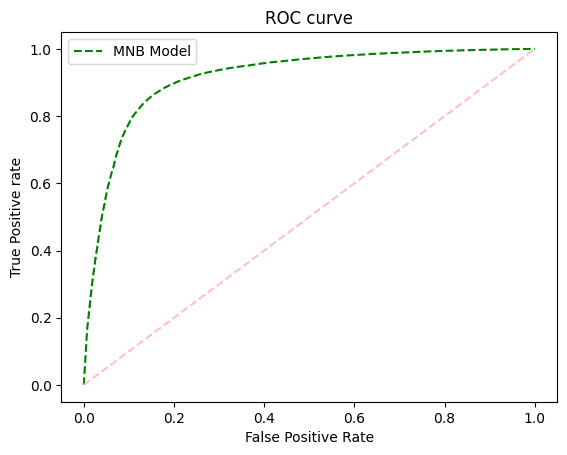

In [30]:
from sklearn.metrics import roc_curve

 

MNB_prob = MNB.predict_proba(X_test)


# roc curve for model

fpr2, tpr2, thresh2 = roc_curve(y_test, MNB_prob[:,1], pos_label=1)


# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


# auc scores
from sklearn.metrics import roc_auc_score

auc_MNB = roc_auc_score(y_test, MNB_prob[:,1])

print(auc_MNB)

# plot roc curve

plt.plot(fpr2, tpr2, linestyle='--',color='green', label='MNB Model')

plt.plot(p_fpr, p_tpr, linestyle='--', color='pink')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
text_count_2 = tfidf.fit_transform(nb['Review'])

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv_twograms = CountVectorizer(stop_words='english',ngram_range = (2,2),tokenizer = token.tokenize)
text_counts_twograms = cv_twograms.fit_transform(nb['Review'])

X_train, X_test, y_train, y_test = train_test_split(text_counts_twograms, nb['Sentiment'], test_size=0.20,random_state=30)

MNB = MultinomialNB()
MNB.fit(X_train, y_train)
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)
print('model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')

C:\Users\eyad_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


model accuracy is 88.95%
